About dataset: "Superstore Sales Dataset" is a comprehensive collection of sales, customer, and product data for analysis from Kaggle. Includes columns like Order Date, Ship Date, Customer ID, Product Category, Sales, Quantity, Discount, and Profit. Valuable resource for exploring trends and optimizing business strategies. 

In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_excel(r'/Data/Superstore.xlsx')

In [4]:
df.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,SecondClass,CG-12520,ClaireGute,Consumer,UnitedStates,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,BushSomersetCollectionBookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,SecondClass,CG-12520,ClaireGute,Consumer,UnitedStates,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"HonDeluxeFabricUpholsteredStackingChairs,Round...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,SecondClass,DV-13045,DarrinVanHuff,Corporate,UnitedStates,LosAngeles,...,90036,West,OFF-LA-10000240,OfficeSupplies,Labels,Self-AdhesiveAddressLabelsforTypewritersbyUniv...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,StandardClass,SO-20335,SeanO'Donnell,Consumer,UnitedStates,FortLauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,BretfordCR4500SeriesSlimRectangularTable,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,StandardClass,SO-20335,SeanO'Donnell,Consumer,UnitedStates,FortLauderdale,...,33311,South,OFF-ST-10000760,OfficeSupplies,Storage,EldonFold'NRollCartSystem,22.3680,2,0.20,2.5164


In [46]:
df.isnull().sum()

RowID           0
OrderID         0
OrderDate       0
ShipDate        0
ShipMode        0
CustomerID      0
CustomerName    0
Segment         0
Country         0
City            0
State           0
PostalCode      0
Region          0
ProductID       0
Category        0
Sub-Category    0
ProductName     0
Sales           0
Quantity        0
Discount        0
Profit          0
ShippingDays    0
ProfitMargin    0
LossFlag        0
dtype: int64

In [47]:
df.duplicated().sum()

np.int64(0)

In [70]:
df['ProfitMargin']=df['Profit']/df['Sales']

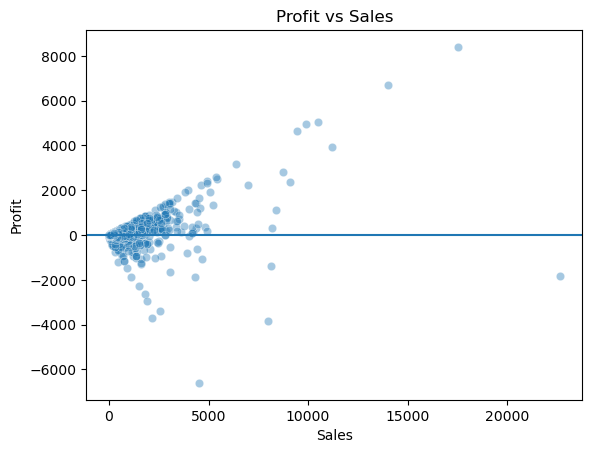

In [71]:
#profit analysis 
#profit vs sales
plt.figure()
sns.scatterplot(x='Sales',y='Profit',data=df,alpha=0.4)
plt.axhline(0)
plt.title('Profit vs Sales')
plt.show() 

The scatter plot shows that while profit tends to increase with sales on average, the relationship is highly volatile. A significant number of high-sales orders generate negative profit, indicating pricing or discount-related issues. This suggests that revenue growth alone does not ensure profitability, and large orders introduce substantial financial risk.

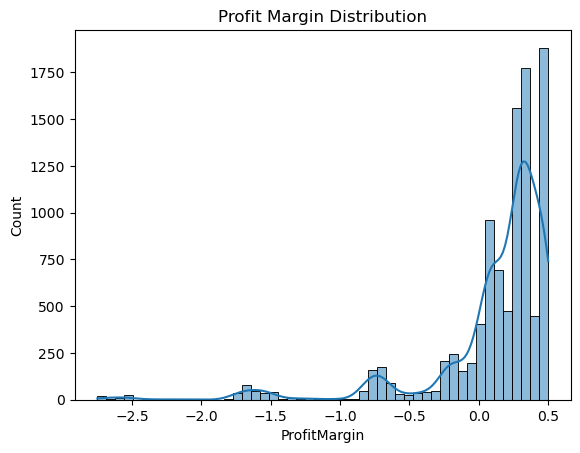

In [72]:
#profit margin distribution
plt.figure()
sns.histplot(df['ProfitMargin'],bins=50,kde=True)
plt.title('Profit Margin Distribution')
plt.show()

The profit margin distribution is heavily left-skewed. While the majority of orders generate modest positive margins, a small number of extreme loss-making orders exhibit disproportionately negative margins. These outliers pose a significant risk to overall profitability and suggest structural issues related to discounting or cost management.

In [73]:
sub_category_lowmargin=df.groupby('Sub-Category')['ProfitMargin'].mean().sort_values().head(10)
print(sub_category_lowmargin)

Sub-Category
Binders       -0.199595
Appliances    -0.156869
Tables        -0.147727
Bookcases     -0.126640
Machines      -0.072026
Chairs         0.043900
Storage        0.089113
Supplies       0.112039
Phones         0.119222
Furnishings    0.137066
Name: ProfitMargin, dtype: float64


In [74]:
sub_category_profit=df.groupby('Sub-Category')['Profit'].mean().sort_values()
print(sub_category_profit)

Sub-Category
Tables         -55.565771
Bookcases      -15.230509
Supplies        -6.258418
Fasteners        4.375660
Art              8.200737
Furnishings     13.645918
Labels          15.236962
Binders         19.843574
Paper           24.856620
Storage         25.152277
Envelopes       27.418019
Machines        29.432669
Appliances      38.922758
Chairs          43.095894
Phones          50.073938
Accessories     54.111788
Copiers        817.909190
Name: Profit, dtype: float64


Although Binders, Appliances, and Machines have negative average profit margins, they continue to generate positive total profits, indicating a volume- or mix-driven strategy with underlying margin constraints.

In [75]:
df[(df['Sales'] > 5000) & (df['Profit'] < 0)][['Sales','Profit','ProfitMargin','Discount','Category','Sub-Category']]

,Sales,Profit,ProfitMargin,Discount,Category,Sub-Category
165,8159.952,-1359.9920,-0.166667,0.4,Technology,Machines
683,7999.980,-3839.9904,-0.480000,0.5,Technology,Machines
2697,22638.480,-1811.0784,-0.080000,0.5,Technology,Machines


Take Machine for example: 

In [76]:
df[df['Sub-Category']=='Machines'].groupby(df['OrderDate'].dt.year)['ProfitMargin'].mean()

OrderDate
2011   -0.040907
2012    0.004003
2013   -0.165487
2014   -0.061210
Name: ProfitMargin, dtype: float64

In [77]:
df[df['Sub-Category']=='Machines'].groupby(df['OrderDate'].dt.year)['Profit'].mean()

OrderDate
2011     14.198804
2012    124.061900
2013     90.853687
2014    -86.945927
Name: Profit, dtype: float64

In [78]:
sales = df.groupby('Sub-Category')['Sales'].mean().sort_values()
top10_sales=sales.tail(10)
print(top10_sales)

Sub-Category
Accessories     215.974604
Appliances      230.755710
Supplies        245.650200
Storage         264.590553
Phones          371.211534
Bookcases       503.859633
Chairs          532.332420
Tables          648.794771
Machines       1645.553313
Copiers        2198.941618
Name: Sales, dtype: float64


Machines exhibit negative profit margins across multiple years, it generate positive total profits due to high sales volume. This indicates a volume-driven strategy where scale compensates for low or negative unit margins. While effective in maintaining overall profitability, this approach exposes the firm to margin sensitivity and suggests opportunities for targeted pricing or cost optimization.

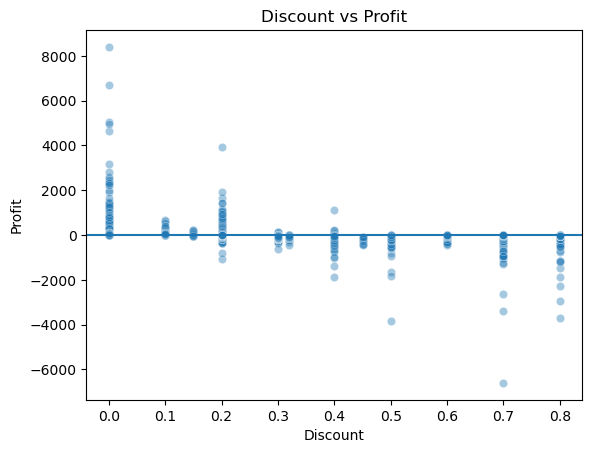

In [79]:
#Discount Analysis
#Discount VS Profit
plt.figure()
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.4)
plt.axhline(0)
plt.title("Discount vs Profit")
plt.show()

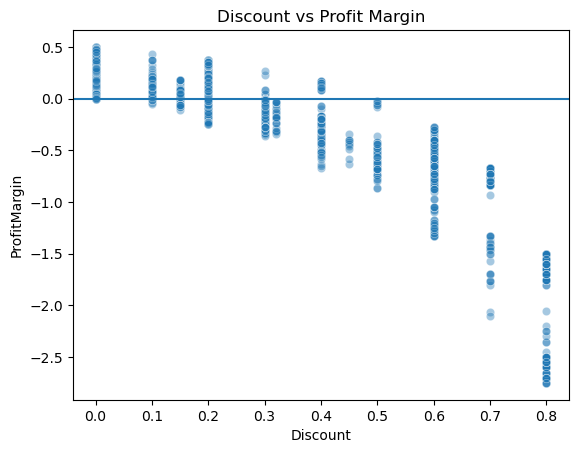

In [80]:
#Discount VS Profit Margin
plt.figure()
sns.scatterplot(x='Discount', y='ProfitMargin', data=df, alpha=0.4)
plt.axhline(0)
plt.title("Discount vs Profit Margin")
plt.show()

In [81]:
df.groupby(pd.cut(df['Discount'], bins=[0,0.1,0.2,0.3,0.4,0.5]))['ProfitMargin'].mean()

/var/folders/s6/p0tt8_sj6_37d9kqsrgc7pxw0000gn/T/ipykernel_15059/3882672948.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['Discount'], bins=[0,0.1,0.2,0.3,0.4,0.5]))['ProfitMargin'].mean()


Discount
(0.0, 0.1]    0.155792
(0.1, 0.2]    0.174839
(0.2, 0.3]   -0.115481
(0.3, 0.4]   -0.216907
(0.4, 0.5]   -0.535584
Name: ProfitMargin, dtype: float64

In [82]:
df.groupby(pd.cut(df['Discount'], bins=[0,0.1,0.2,0.3,0.4,0.5]))['Profit'].mean()

/var/folders/s6/p0tt8_sj6_37d9kqsrgc7pxw0000gn/T/ipykernel_15059/996455808.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['Discount'], bins=[0,0.1,0.2,0.3,0.4,0.5]))['Profit'].mean()


Discount
(0.0, 0.1]     96.055074
(0.1, 0.2]     24.738824
(0.2, 0.3]    -45.679636
(0.3, 0.4]   -109.219691
(0.4, 0.5]   -298.695314
Name: Profit, dtype: float64

This shows that high discount will lead to a low profit and profit margin. It identifies a clear profitability tipping point at approximately a 20% discount level. Orders with discounts below 20% remain profitable on average, while margins turn negative beyond this threshold and deteriorate rapidly as discounts increase. Although the firm remains profitable overall, these results suggest that introducing discount plan carefully could materially improve profitability without sacrificing sales volume.

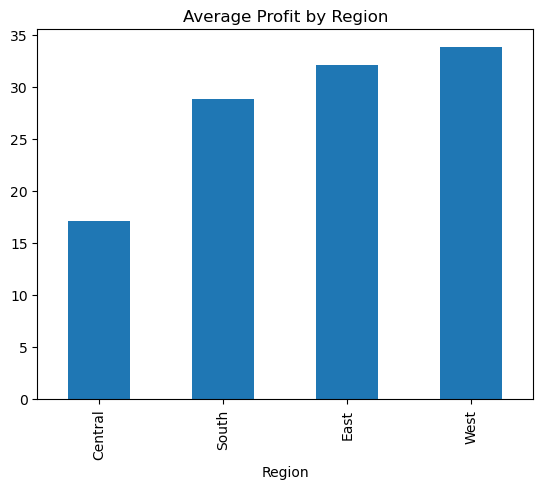

In [83]:
#Region VS Profit
region_profit = df.groupby('Region')['Profit'].mean().sort_values()

plt.figure()
region_profit.plot(kind='bar')
plt.title("Average Profit by Region")
plt.show()

We can know that the West region has the highest average profit, followed by the East, South, and Central regions, with Central being the lowest. This may suggests that the company’s products or services are performing best in the West, possibly due to higher market demand, effective sales strategies, or better operational efficiency.
The East and South regions may show moderate performance and may have growth potential if best practices from the West are applied. The Central region, with the lowest profitability, may require a review of market strategies, cost management, or product offerings to improve performance.

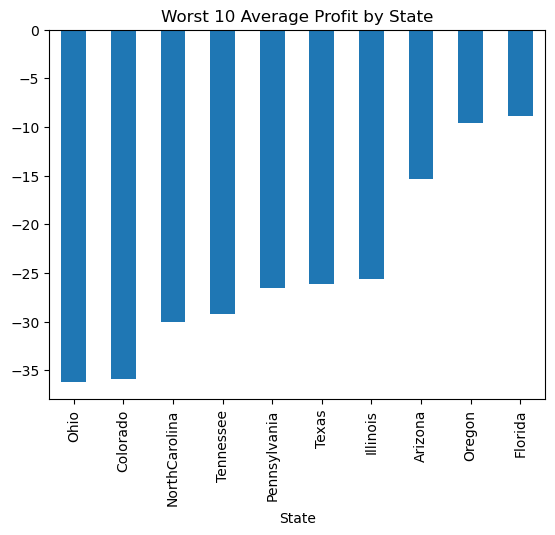

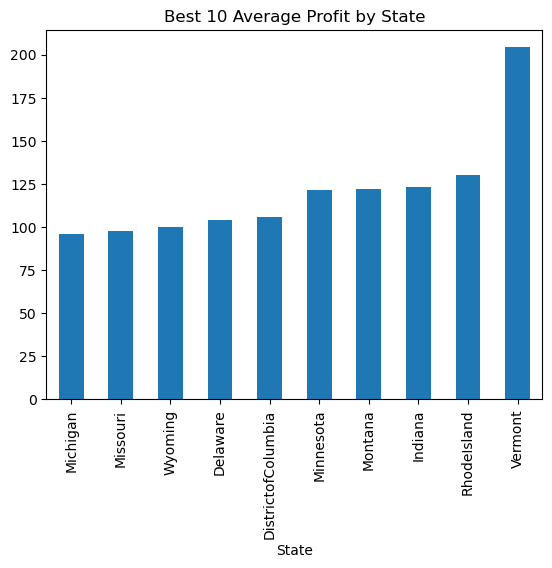

Worst 10 states:
State
Ohio            -36.186304
Colorado        -35.867351
NorthCarolina   -30.083985
Tennessee       -29.189583
Pennsylvania    -26.507598
Texas           -26.121174
Illinois        -25.625787
Arizona         -15.303235
Oregon           -9.600569
Florida          -8.875461
Name: Profit, dtype: float64

Best 10 states:
State
Michigan               95.934069
Missouri               97.518341
Wyoming               100.196000
Delaware              103.930988
DistrictofColumbia    105.958930
Minnesota             121.608847
Montana               122.221900
Indiana               123.375411
RhodeIsland           130.100523
Vermont               204.088936
Name: Profit, dtype: float64


In [84]:
#State VS Profit
state_profit = df.groupby('State')['Profit'].mean().sort_values()
worst10_state_profit=state_profit.head(10)
top10_state_profit=state_profit.tail(10)

plt.figure()
worst10_state_profit.plot(kind='bar')
plt.title("Worst 10 Average Profit by State")
plt.show()

plt.figure()
top10_state_profit.plot(kind='bar')
plt.title("Best 10 Average Profit by State")
plt.show()

print("Worst 10 states:")
print(state_profit.head(10))

print("\nBest 10 states:")
print(state_profit.tail(10))


This state-level profits shows that Vermont, Rhode Island, Indiana, and Minnesota are the top-performing states, with the highest profits, while Ohio, Colorado, North Carolina, and Tennessee are the lowest-performing states. This indicates significant variation in profitability across states, suggesting that market demand, competition, or operational efficiency differs regionally.
The company could focus on strengthening strategies in high-profit states and investigate challenges in low-profit states to improve overall performance.

In [85]:
#Category Summary
category_summary = (
    df.groupby('Category')
      .agg(
          Total_Sales=('Sales', 'sum'),
          Total_Profit=('Profit', 'sum'),
          Avg_Profit=('Profit', 'mean'),
          Avg_Profit_Margin=('ProfitMargin', 'mean'),
          Total_Discount=('Discount','mean'),
          Loss_Rate=('LossFlag', 'mean')
        
      )
      .sort_values('Avg_Profit_Margin')
)

category_summary

,Total_Sales,Total_Profit,Avg_Profit,Avg_Profit_Margin,Total_Discount,Loss_Rate
Category,,,,,,
Furniture,741999.7953,18451.2728,8.699327,0.038784,0.173923,0.336634
OfficeSupplies,719047.0320,122490.8008,20.327050,0.138030,0.157285,0.147030
Technology,836154.0330,145454.9481,78.752002,0.156138,0.132323,0.146724


Technology is the most profitable category with the highest average profit and profit margin. Office Supplies is moderately profitable, while Furniture has low profit and high loss, indicating it is the least efficient in generating profit.

In [86]:
#RFM customer segmentation

In [87]:
snapshot_date = df['OrderDate'].max()+ pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'OrderDate':lambda x: (snapshot_date - x.max()).days,
    'OrderID':'nunique',
    'Profit':'sum'
}).reset_index()

rfm.columns=['CustomerID','Recency','Frequency','Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,AA-10315,185,5,-362.8825
1,AA-10375,20,9,277.3824
2,AA-10480,260,4,435.8274
3,AA-10645,56,6,857.8033
4,AB-10015,416,3,129.3465


In [88]:
#Sandardization 
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


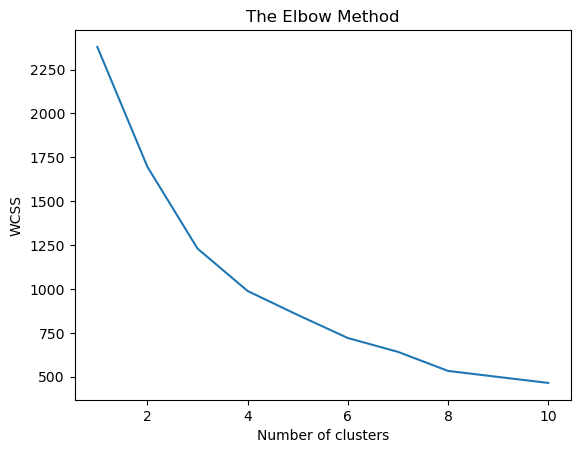

In [89]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

（In this project, the Elbow Method was employed to determine the optimal number of clusters. By analyzing the Within-Cluster Sum of Squares (WCSS) curve, a distinct "elbow" point is observed at K=4. This indicates that segmenting the Superstore customers into four specific groups—Core VIPs, High-Frequency Loyalists, Potential Customers, and High-Return Risk Customers—is statistically the most sound approach. This configuration maximizes group representativeness while maintaining model parsimony by avoiding unnecessary complexity.）

In [90]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()


,Recency,Frequency,Monetary
Cluster,,,
0,72.605178,8.669903,404.497299
1,99.698225,4.736686,80.118930
2,547.708738,3.825243,175.693118
3,108.441860,7.790698,2703.041093


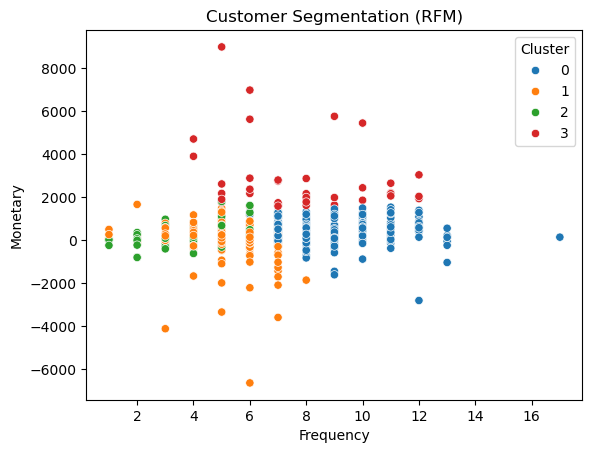

In [91]:
plt.figure()
sns.scatterplot(
    x='Frequency',
    y='Monetary',
    hue='Cluster',
    data=rfm,
    palette='tab10'
)
plt.title("Customer Segmentation (RFM)")
plt.show()


This scatter plot illustrates the distribution of customers across four distinct clusters based on their Frequency and Monetary (total spend) behaviors.

Cluster 3 (High-Value Tier): Identified as the premium segment. These customers exhibit high-to-extreme monetary contributions with consistent engagement. They represent the highest Customer Lifetime Value (CLV).

Cluster 0 (High-Engagement Tier): Characterized by maximum transaction frequency but lower individual spend compared to Cluster 3. These are the brand’s most habitual users, providing a stable foundation of activity.

Cluster 2 (Developmental Tier): Positioned at the lower-left quadrant, this group shows moderate engagement. They represent an opportunity for "upselling" to increase their monetary value.

Cluster 1 (At-Risk / Low-Value Tier): This segment is notable for low frequency and a high density of negative monetary values. This indicates a high volume of returns or refunds, suggesting these customers may be unprofitable or "at-risk" of churning.

The company should focus on retention for Cluster 3 and frequency-to-value conversion for Cluster 0. 

In [92]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,AA-10315,185,5,-362.8825,1
1,AA-10375,20,9,277.3824,0
2,AA-10480,260,4,435.8274,1
3,AA-10645,56,6,857.8033,1
4,AB-10015,416,3,129.3465,2


In [93]:
rfm.loc[rfm['Cluster'] == 3, 'CustomerID'] #check the cluster 3 customers

5      AB-10060
6      AB-10105
15     AD-10180
48     AR-10540
92     BM-11650
104    BS-11365
131    CC-12370
152    CL-12565
160    CM-12385
162    CM-12655
223    DM-13015
232    DP-13390
233    DR-12880
234    DR-12940
285    FH-14365
311    GT-14710
327    HL-15040
328    HM-14860
333    HW-14935
352    JD-16150
354    JE-15610
394    JM-15865
410    JW-15220
424    KD-16495
427    KF-16285
445    KW-16435
447    LA-16780
497    ME-17320
568    NM-18445
597    PK-19075
610    PS-19045
621    RB-19360
649    RM-19675
660    RW-19540
669    SC-20095
682    SD-20485
683    SE-20110
712    SR-20740
730    TA-21385
737    TB-21400
741    TC-20980
764    TS-21370
790    YS-21880
Name: CustomerID, dtype: object